In [5]:
#Import the requires libraries
from keras import Sequential
from keras.layers import Convolution2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import Dense

In [6]:
#Create an instance
classifier = Sequential()

In [11]:
#Step 1:Convolution
#Use RELU for avoiding negative values of pixels
#32->no. of feature detectors
#(3,3)->Size of filter
#input_shape -> Scale all images to same size
classifier.add(Convolution2D(32,(3,3),input_shape = (64,64,3),activation='relu'))

In [13]:
#Step 2:Max Pooling
#Feature Map -> Reduced Feature Map
classifier.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
#Step 3:Flattening
#Feature Map -> Single Vector(acts as input layer to ANN)
classifier.add(Flatten())

In [18]:
#Step 4:Full Connection
#Create an ANN with the above vector as input layer

#Hidden Layer
#classifier.add(Dense(output_dim = 128 ,activation = 'relu')) Old version format
classifier.add(Dense(units = 128 ,activation = 'relu'))
#output_dim/units should be in range of 100. Power of 2 is preferred

#Output Layer
classifier.add(Dense(units = 1 ,activation = 'sigmoid'))
#Activation = sigmoid coz we have binary outcome else use 'softmax'

In [20]:
#Compile the CNN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#loss = 'binarycrossentropy' coz we have binary outcome else use catergorical_crossentropy

In [21]:
#Part 2:Fitting Images to CNN

In [25]:
#Image Augumentation/Preprocessing
#This is done to avoid overfitting i.e when train accuracy >> test accuracy
#Use Keras Documentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory( 'dataset/training_set',target_size=(64, 64),batch_size=32,class_mode='binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',target_size=(64, 64),batch_size=32,class_mode='binary')

classifier.fit_generator(
        training_set,
        steps_per_epoch=8000,
        epochs=25,
        validation_data=test_set,
        nb_val_samples =2000)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/25


C:\Users\aronp\Anaconda3\envs\aron3.6\lib\site-packages\ipykernel_launcher.py:22: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\Users\aronp\Anaconda3\envs\aron3.6\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=8000, epochs=25, validation_data=<keras_pre..., validation_steps=2000)`


8000/8000 [==============================] - 2209s 276ms/step - loss: 0.2957 - acc: 0.8685 - val_loss: 0.6402 - val_acc: 0.7888
Epoch 2/25
8000/8000 [==============================] - 2192s 274ms/step - loss: 0.0937 - acc: 0.9646 - val_loss: 0.9276 - val_acc: 0.8041
Epoch 3/25
8000/8000 [==============================] - 2178s 272ms/step - loss: 0.0512 - acc: 0.9815 - val_loss: 0.9925 - val_acc: 0.8130
Epoch 4/25
8000/8000 [==============================] - 2189s 274ms/step - loss: 0.0360 - acc: 0.9877 - val_loss: 1.1021 - val_acc: 0.8226
Epoch 5/25
8000/8000 [==============================] - 2177s 272ms/step - loss: 0.0281 - acc: 0.9904 - val_loss: 0.9898 - val_acc: 0.8099
Epoch 6/25
8000/8000 [==============================] - 2159s 270ms/step - loss: 0.0229 - acc: 0.9921 - val_loss: 1.1158 - val_acc: 0.8061
Epoch 7/25
8000/8000 [==============================] - 2155s 269ms/step - loss: 0.0201 - acc: 0.9933 - val_loss: 1.3343 - val_acc: 0.8012
Epoch 8/25
8000/8000 [================

Train Accuracy = 0.9970

Test Accuracy = 0.8206

# Example

In [23]:
#Import OpeCV for loading images
#We take an image of a cat looking like a dog
import cv2
img = cv2.imread('cat.jpg')
img.shape

(910, 1200, 3)

In [24]:
#Check the shape
img.shape

(910, 1200, 3)

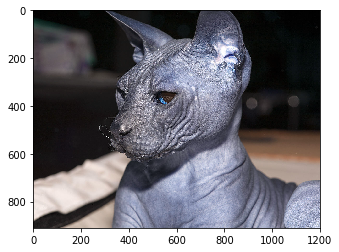

In [25]:
#Display the image
import matplotlib.pyplot as plt
plt.imshow(img)

In [16]:
#Since the input requires 4 dimensions with size of (64,64,3) we resize the image
img.resize(1,64, 64, 3)

In [17]:
#Check the shape
img.shape

(1, 64, 64, 3)

In [ ]:
#Run this line to check if the model is able to predict accurately
#Unfortunately my kernel restarted and it takes a lot of time to start all over again so I cannot run it
pred = classifier.predict(img)
print(pred)